# Project - Support-Vector Classification
- Classify dogs

### Classification task
- 3 dog types and corresponding data

<table>
    <tr>
        <td>Dobermann</td>
        <td><img src="img/dobermann.jpg" width="100" align="left"></td>
    </tr>
    <tr>
        <td>German Shepherd</td>
        <td><img src="img/german_shepherd.jpg" width="100" align="left"></td>
    </tr>
    <tr>
        <td>Rottweiler</td>
        <td><img src="img/rottweiler.jpg" width="100" align="left"></td>
    </tr>
</table>

### Step 1: Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: Read the data
- Use Pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method to read **files/data_02.csv**

In [2]:
df=pd.read_csv('files/data_02.csv')

In [3]:
df

,Weight,Height,Class
0,42.2,66,Dobermann
1,43.0,70,Dobermann
2,39.2,67,Dobermann
3,49.9,63,Rottweiler
4,39.5,65,German Shepherd
...,...,...,...
295,43.3,67,Dobermann
296,52.0,66,Rottweiler
297,32.1,61,German Shepherd
298,36.8,63,German Shepherd


### Step 3: Make class IDs
- Note: The model works with name classes - but often it is convenient to use numbers for classes
- Create a dictionary to map class names to integers numbers.
    - Hint: **class_ids = {'Dobermann': 0, 'German Shepherd': 1, 'Rottweiler': 2}**
- Create a column with **Class ID**
    - Hint: you can use **apply(lambda x: class_ids[x])**

In [5]:
class_ids={'Dobermann': 0, 'German Shepherd': 1, 'Rottweiler': 2}
df['class_ID']= df.Class.apply(lambda x: class_ids[x])
df

,Weight,Height,Class,class_ID
0,42.2,66,Dobermann,0
1,43.0,70,Dobermann,0
2,39.2,67,Dobermann,0
3,49.9,63,Rottweiler,2
4,39.5,65,German Shepherd,1
...,...,...,...,...
295,43.3,67,Dobermann,0
296,52.0,66,Rottweiler,2
297,32.1,61,German Shepherd,1
298,36.8,63,German Shepherd,1


In [6]:
df_=df.drop('Class',axis=1)
df_

,Weight,Height,class_ID
0,42.2,66,0
1,43.0,70,0
2,39.2,67,0
3,49.9,63,2
4,39.5,65,1
...,...,...,...
295,43.3,67,0
296,52.0,66,2
297,32.1,61,1
298,36.8,63,1


### Step 4: Scatter plot the data
- Create a figure and axes (**fig, ax**) from matplotlib.pyplot (**plt**)
- Make a scatter plot using the **Class ID** column as color.
    - Hint: [Docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html) use **Weight** and **Height** for **x** and **y**, respectively.

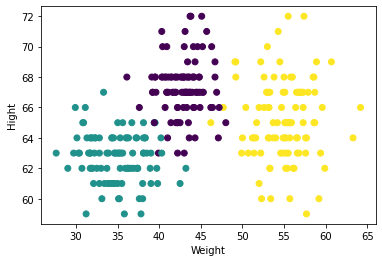

In [8]:
plt.xlabel('Weight')
plt.ylabel('Hight')
plt.scatter(df_['Weight'],df_['Height'],c=df_['class_ID'])

### Step 5: Fit a model
- Use the **SVC** model with **kernel='linear'**
- Fit the model

In [9]:
from sklearn.model_selection import train_test_split 

In [10]:
x=df_.drop('class_ID',axis=1)
y=df_['class_ID']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [12]:
model_kernal=SVC(kernel='linear')
model_kernal.fit(x_train,y_train)
model_kernal.score(x_test,y_test)

0.9333333333333333

### Step 6: Map out the classification
- Create a random selection of data
    - HINT: use **np.random.rand(10000, 2)** and "shift" the data with ***(40, 20) + (25, 55)**
- Predict the random selction of data
- Create a plot with the data and predictions

In [25]:
p=model_kernal.predict(np.random.rand(300, 2) *(40, 20) + (25, 55))
p

array([2, 2, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2,
       0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 1, 2, 1, 0, 0,
       1, 0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0,
       1, 2, 2, 1, 1, 1, 2, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1, 0, 2, 2, 2, 1, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 2,
       1, 0, 1, 2, 0, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       1, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2,
       1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1,
       2, 0, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 2,
       1, 1, 0, 1, 1, 1, 2, 1, 2, 0, 2, 2, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1,
       2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 1, 1, 2, 2, 1, 0, 2, 0, 1, 1,
       2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0], d

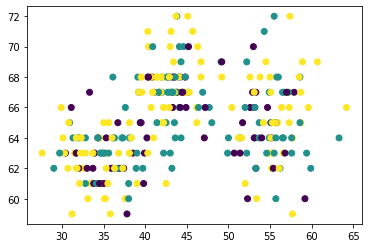

In [26]:
plt.scatter(df_['Weight'],df_['Height'],c=p)

### Step 7 (Optional): Map with original data points
- Make the same plot
- Add the data points from the original dataset
    - You might need to make a color mapping
    - Say, **colors = ['b', 'r', 'g']** and use it on the **Class ID** column with **apply**.